In [1]:
import os

In [2]:
os.getcwd()

'E:\\NLP-&-DL\\Github_Repos\\AnlyticsVidya_Hackathon'

In [3]:
data_dir = "E:\\NLP-&-DL\\Github_Repos\\AnlyticsVidya_Hackathon\\Sorted_Image_Data"

In [4]:
os.listdir(data_dir)

['Test', 'Train']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [6]:
train_path = data_dir+'\\Train\\'
test_path = data_dir+'\\Test\\'

In [7]:
os.listdir(train_path)

['Class_0', 'Class_1']

In [17]:
os.listdir(train_path+'Class_0')[2]

'1005.jpg'

In [18]:
class0_img = train_path+'Class_0\\'+'1005.jpg'

In [19]:
imread(class0_img).shape

(224, 224, 3)

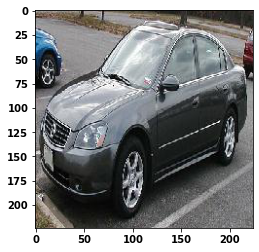

In [20]:
plt.imshow(imread(class0_img))

In [28]:
os.listdir(train_path+'Class_1')[0]

'0.jpg'

In [29]:
class1_img = class0_img = train_path+'Class_1\\'+'0.jpg'

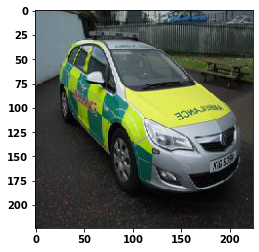

In [30]:
plt.imshow(imread(class1_img))

In [31]:
len(os.listdir(train_path+'Class_0'))

965

In [32]:
len(os.listdir(train_path+'Class_1'))

681

In [34]:
len(os.listdir(test_path+'Test_Images'))

706

### For finding average size of an image

In [36]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'Test_Images'):
    
    img = imread(test_path+'Test_Images\\'+image_filename)
    d1,d2,d3 = img.shape
    dim1.append(d1)
    dim2.append(d2)

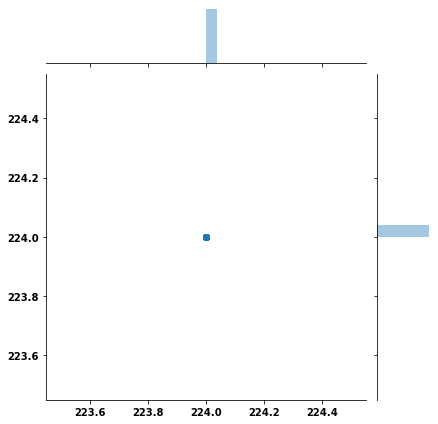

In [37]:
sns.jointplot(dim1,dim2)

In [38]:
np.mean(dim1)

224.0

In [39]:
np.mean(dim2)

224.0

In [60]:
image_shape = (224,224,3) 

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
imread(class0_img).max() # Not sclaed

255

In [76]:
image_gen = ImageDataGenerator(rescale=1/255,
                               rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               validation_split=0.2) 

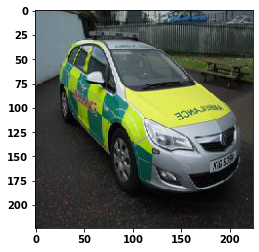

In [77]:
class0_imread = imread(class0_img)
plt.imshow(class0_imread)

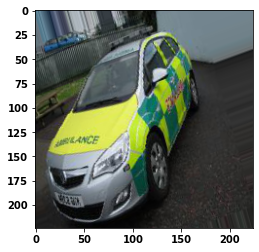

In [78]:
plt.imshow(image_gen.random_transform(class0_imread))

In [79]:
train_path

'E:\\NLP-&-DL\\Github_Repos\\AnlyticsVidya_Hackathon\\Sorted_Image_Data\\Train\\'

In [80]:
image_gen.flow_from_directory(train_path)

Found 1646 images belonging to 2 classes.


In [81]:
image_gen.flow_from_directory(test_path)

Found 706 images belonging to 1 classes.


In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout, Flatten

In [83]:
tf.config.list_physical_devices('GPU')

[]

In [84]:
model = Sequential()

model.add(Conv2D(filters=6,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 6)       168       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 16)      880       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 46656)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               5972096   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [86]:
batch_size = 8

In [87]:
image_shape[:2]

(224, 224)

In [89]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             subset='training')

validation_image_gen = image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             subset='validation')

Found 1317 images belonging to 2 classes.
Found 329 images belonging to 2 classes.


In [90]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=False)

Found 706 images belonging to 1 classes.


In [91]:
train_image_gen.class_indices

{'Class_0': 0, 'Class_1': 1}

In [92]:
model.fit(train_image_gen,epochs=4,validation_data = validation_image_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 165 steps, validate for 42 steps
Epoch 1/4
165/165 [==============================] - 66s 398ms/step - loss: 0.6958 - accuracy: 0.6279 - val_loss: 0.5739 - val_accuracy: 0.7720
Epoch 2/4
165/165 [==============================] - 65s 396ms/step - loss: 0.5717 - accuracy: 0.7274 - val_loss: 0.5713 - val_accuracy: 0.7416
Epoch 3/4
 53/165 [========>.....................] - ETA: 37s - loss: 0.5254 - accuracy: 0.7524

KeyboardInterrupt: 